 # YELP DATA ANALYSIS

## In this analysis you will get to see Exploratory Data Analysis and Feature Engineering done on Yelp Dataset.

## This script includes 2 methods for performing analysis:
###### ( Click on any one of the given methods to get directly reach to the method )

## Method 1


## Method 2  ( recommended )

In [779]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import plotly
import cufflinks

In [780]:
from plotly.offline import init_notebook_mode,download_plotlyjs,plot,iplot
init_notebook_mode(connected=True)

In [4]:
cufflinks.go_offline()

In [5]:
import ijson
import io

In [475]:
# yelp_business dataset

df_business = pd.read_json('C:/Users/tyagi/Desktop/yelp_dataset/yelp_dataset/yelp_academic_dataset_business.json',lines=True)

In [476]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ


In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# open input file: 
ifile = open('C:/Users/tyagi/Desktop/yelp_dataset/yelp_dataset/yelp_academic_dataset_review.json', encoding="utf8") 

# read the first 100k entries
# set to -1 to process everything
stop = 2000000

all_data = list()
for i, line in enumerate(ifile):
    if i%2000000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    business_id = data['business_id']
    cool = data['cool']
    funny = data['funny']
    useful = data['useful']
    # add to the data collected so far
    all_data.append([business_id,text,stars,cool,funny,useful])
# create the DataFrame
df_reviews = pd.DataFrame(all_data, columns=['business_id','text','stars','cool','funny','useful'])
# print(df)
# df.to_hdf('revie20ws.h5','reviews')

ifile.close()

0
2000000


In [30]:
df_reviews.head(2)



# Analysis on 2,000,000 reviews.

,business_id,text,stars,cool,funny,useful
0,-MhfebM0QIsKt87iDN-FNw,"As someone who has worked with many museums, I...",2.0,0,0,5
1,lbrU8StCq3yDfr-QMnGrmQ,I am actually horrified this place is still in...,1.0,0,1,1


# Exploratory Data Analysis

In [31]:
# Filters

# get rows in which category column includes word = 'Restaurants' or 'Restaurant'
# get restaurants with star rating 3 to 5.
# look into columns useful,funny,cool,text

# remove columns longitute,latitude,date,user_id,address,city,postal code from business data

In [477]:
 # remove columns longitute,latitude,date,user_id,address,city,postal code from business data
    
df_business = df_business.drop(['address','latitude', 'longitude','city', 'state','postal_code'],axis=1)

# Method 1

### Merging business and reviews dataset to make a final dataset for further analysis.

#### This is done to know which reviews belong to Restaurants only.

In [34]:
df_final = df_reviews.merge(df_business,on='business_id')

In [35]:
df_final.shape

(2000000, 13)

In [36]:
# EDA on df_final dataset

# df_final.info()

In [37]:
df_final['stars_x'].value_counts()

5.0    894000
4.0    423057
1.0    312547
3.0    211838
2.0    158558
Name: stars_x, dtype: int64

In [38]:
df_final['stars_y'].value_counts().sort_index()

1.0      8643
1.5     27352
2.0     57034
2.5    126136
3.0    254983
3.5    432133
4.0    604980
4.5    403193
5.0     85546
Name: stars_y, dtype: int64

In [39]:
df_final.isna().sum()

business_id          0
text                 0
stars_x              0
cool                 0
funny                0
useful               0
attributes       57159
categories         538
hours           140323
is_open              0
name                 0
review_count         0
stars_y              0
dtype: int64

In [ ]:
# get restaurants with star rating 3.5 to 5.


# df_final = df_final[(df_final['stars_x'] >= 4) & (df_final['stars_x'] <= 5)]

In [41]:
# hours column is also irrelevant.

df_final = df_final.drop('hours',axis=1)

In [43]:
# Categories column : fillna. with forward fill as no.of null values in less than 0.5% of total records.

df_final['categories'].fillna(method='ffill',inplace=True)

In [54]:
pd.Series(df_final['attributes'][2])

BusinessAcceptsCreditCards                                                 True
RestaurantsPriceRange2                                                        2
GoodForKids                                                               False
BusinessParking               {'garage': True, 'street': False, 'validated':...
ByAppointmentOnly                                                         False
DogsAllowed                                                               False
WiFi                                                                    u'free'
BikeParking                                                               False
dtype: object

In [55]:
df_final.head(1)

,business_id,text,stars_x,cool,funny,useful,attributes,categories,is_open,name,review_count,stars_y
0,-MhfebM0QIsKt87iDN-FNw,"As someone who has worked with many museums, I...",2.0,0,0,5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Shopping, Arts & Entertainment, Art Galleries,...",1,Bellagio Gallery of Fine Art,180,3.5


In [185]:
# Displaying count of reviews in %age form on the basis of unique star values.


(round(df_final['stars_x'].value_counts()/len(df_final),4)*100).sort_values(ascending=True)

2.0     7.93
3.0    10.59
1.0    15.63
4.0    21.15
5.0    44.70
Name: stars_x, dtype: float64

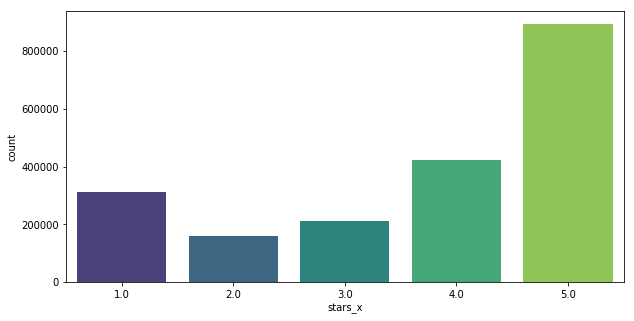

In [189]:
# stars_x column is from reviews and stars_y column is from business dataset.



plt.figure(figsize=(10,5))
sns.countplot(df_final['stars_x'],palette='viridis')


# Maximum values are between stars 4 and 5.

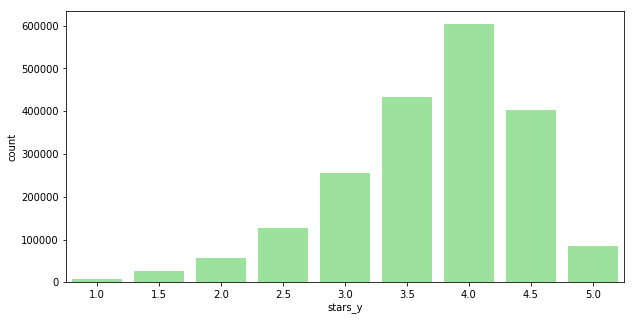

In [199]:
plt.figure(figsize=(10,5))
sns.countplot(df_final['stars_y'],color='lightgreen')


# Maximum values are between stars 3 and 4.5.      

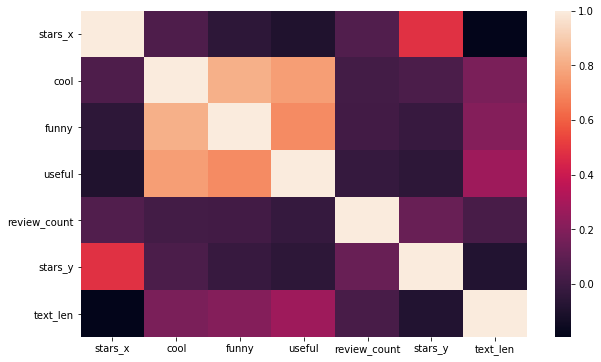

In [206]:
# analysing relation b/w stars_x and stars_y

plt.figure(figsize=(10,6))
sns.heatmap(df_final.corr())

In [96]:
# we will now filter our df_final dataset by having those rows having words like restaurants in its category column.

In [104]:
r = ['Restaurants,','Restaurant','Restaurants','Mexican,','Pizza,','Pizza','Mexican','Italian,',' Sandwiches,']

In [105]:
import string

In [111]:
import nltk
from nltk.corpus import stopwords

In [112]:
def clean(i):
    nopunc = [word for word in i if word not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_messs = [h for h in nopunc.split() if h.lower() not in stopwords.words('english')]
    return clean_messs

In [115]:
df_final['text_len'] = df_final['text'].apply(lambda x : len(x))

In [116]:
df_final.head(2)

,business_id,text,stars_x,cool,funny,useful,attributes,categories,is_open,name,review_count,stars_y,text_len
0,-MhfebM0QIsKt87iDN-FNw,"As someone who has worked with many museums, I...",2.0,0,0,5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Shopping, Arts & Entertainment, Art Galleries,...",1,Bellagio Gallery of Fine Art,180,3.5,1373
1,-MhfebM0QIsKt87iDN-FNw,I have been there. I believe more than once. \...,2.0,0,2,2,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Shopping, Arts & Entertainment, Art Galleries,...",1,Bellagio Gallery of Fine Art,180,3.5,311


In [167]:
# we do not need business_id column, because we now know which review belongs to which business.

# we just needed categories column from business table.

# is_open column is also not required.

df_final = df_final.drop(['business_id','is_open'],axis=1)

In [177]:
df_final.head(2)

,text,stars_x,cool,funny,useful,attributes,categories,name,review_count,stars_y,text_len
0,"As someone who has worked with many museums, I...",2.0,0,0,5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",[ShoppingArtsEntertainmentArtGalleriesMuseums],Bellagio Gallery of Fine Art,180,3.5,1373
1,I have been there. I believe more than once. \...,2.0,0,2,2,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",[ShoppingArtsEntertainmentArtGalleriesMuseums],Bellagio Gallery of Fine Art,180,3.5,311


## Method 1 works but takes a bit long to run functions on table columns.

# Method 2

### First, we filter business dataset to know businee_id of Restaurants only.
### And then Merge the business and reviews table. 

In [479]:
df_business['categories'][:10]

0    Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...
1    Health & Medical, Fitness & Instruction, Yoga,...
2                     Pets, Pet Services, Pet Groomers
3    Hardware Stores, Home Services, Building Suppl...
4    Home Services, Plumbing, Electricians, Handyma...
5    Auto Repair, Automotive, Oil Change Stations, ...
6    Dry Cleaning & Laundry, Local Services, Laundr...
7    Auto Repair, Oil Change Stations, Automotive, ...
8    Ethnic Food, Food Trucks, Specialty Food, Impo...
9    Martial Arts, Gyms, Fitness & Instruction, Act...
Name: categories, dtype: object

In [480]:
df_business.isna().sum()

attributes      29045
business_id         0
categories        524
hours           44843
is_open             0
name                0
review_count        0
stars               0
dtype: int64

In [497]:
# Attribute column is not that relevant because it consist of very basic info.
# also removing hours and is_open column

df_business.drop(['attributes','hours','is_open'],axis=1,inplace=True)

In [ ]:
def clean(i):
    nopunc = [word for word in i if word not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_messs = [h for h in nopunc.split() if h.lower() not in stopwords.words('english')]
    return clean_messs

In [502]:
# first dealing with all the mising values in the table, otherwise error occurs if we run any parameter on it.


df_business.isna().sum()

# category column has very less null values, therefore we can dropna().

df_business.dropna(inplace=True)

In [503]:
df_business['categories2'] = df_business['categories'].apply(clean)

In [504]:
df_business.head(2)

,business_id,categories,name,review_count,stars,categories2
0,f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",The Range At Lake Norman,36,3.5,"[Active, Life, GunRifle, Ranges, Guns, Ammo, S..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...","Carlos Santo, NMD",4,5.0,"[Health, Medical, Fitness, Instruction, Yoga, ..."


In [505]:
df_business.columns

Index(['business_id', 'categories', 'name', 'review_count', 'stars',
       'categories2'],
      dtype='object')

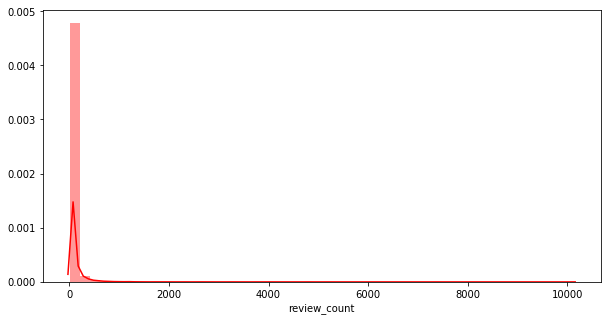

In [507]:
plt.figure(figsize=(10,5))
sns.distplot(df_business['review_count'],color='red')

# numerous Outliers here

In [508]:
rr = 'Restaurants'

In [509]:
def rest(listt):
    if rr in listt:
        return('yes')
    else:
        return('no')

In [510]:
df_business['categories2'] = df_business['categories'].apply(rest)

In [569]:
# df_business_rest : means this dataset consist of restaurants business_id only.

df_business_rest = df_business[df_business['categories2']=='yes']

In [570]:
df_business_rest.shape

(63944, 6)

In [575]:
df_business_rest[df_business_rest['name'].duplicated()][:10]

,business_id,categories,name,review_count,stars,categories2
132,34FYKG4pHNXbM9ZRRiJaGw,"Cafes, Donuts, Food, Coffee & Tea, Restaurants",Tim Hortons,3,1.5,yes
283,_V4CzzA7Z9h4qyLIdG-KUg,"Restaurants, Hot Dogs, Burgers, Fast Food",Wendy's,18,1.5,yes
302,grZ6FnfZoj1pQWElAQve3g,"Fast Food, Restaurants, Burgers",Wendy's,22,2.0,yes
329,CU4LgHxH0EwXnPUmQsWFSQ,"Fast Food, Chicken Shop, Restaurants, Chicken ...",Church's Chicken,14,2.0,yes
405,ccQhq9pSd_5wj1yMwiM7iA,"Mexican, Restaurants",Amando's Bros,4,3.0,yes
455,Hgy5MrIKrwRJDXnwKaCpbA,"Restaurants, Mexican",Garcia's,139,3.0,yes
562,-QC71Wuh0TyJI0RAZ3d0Iw,"Mexican, Restaurants, Fast Food",Chipotle Mexican Grill,29,2.5,yes
588,WUmosjOxt_8nWByHgm8Kkg,"Restaurants, Tex-Mex, Mexican, Fast Food",Chipotle Mexican Grill,99,3.5,yes
626,_8I19IRzDXmMSRES9cEGlw,"Restaurants, Pizza, Fast Food",Little Caesars Pizza,27,1.5,yes
642,-iPc_YSSqvM1CpZxxeUTXw,"Sandwiches, Salad, Restaurants, Event Planning...",Jason's Deli,142,3.5,yes


In [602]:
df_business_rest[df_business_rest['name']=="Little Caesars Pizza"]['stars'].value_counts()

2.0    35
2.5    30
1.5    22
3.0    16
3.5    12
4.0     5
1.0     2
Name: stars, dtype: int64

In [603]:
df_business_rest[df_business_rest['name']=="Jason's Deli"]['stars'].value_counts()

3.5    10
4.0     8
3.0     1
2.5     1
Name: stars, dtype: int64

# I found that there are duplicates in this data.

## treatment of duplicates given below:

In [609]:
df_business_rest = df_business_rest.groupby('name', as_index=False).max()

In [611]:
df_business_rest[df_business_rest.duplicated()]

# no more duplicates

,name,business_id,categories,review_count,stars,categories2


In [612]:
df_business_rest['business_id'].nunique()

43695

## Now , merging df_business_rest and df_reviews on business_id with inner join.

In [616]:
df_business_rest2 = df_business_rest.merge(df_reviews,on='business_id')

In [617]:
df_business_rest2[:1]


# in this, star_x is of business table and star_y is of reviews table.

,name,business_id,categories,review_count,stars_x,categories2,text,stars_y,cool,funny,useful
0,China,AUwEs6MUl3-9AlCh-PEAZQ,"Restaurants, Chinese",10,3.0,yes,"Been going here for years, it's my 'neighborho...",4.0,0,0,1


In [618]:
df_business_rest2.shape

(939548, 11)

In [619]:
df_business_rest2.isna().sum()

name            0
business_id     0
categories      0
review_count    0
stars_x         0
categories2     0
text            0
stars_y         0
cool            0
funny           0
useful          0
dtype: int64

# Exploratory Data Analysis

In [620]:
df_business_rest2.columns

Index(['name', 'business_id', 'categories', 'review_count', 'stars_x',
       'categories2', 'text', 'stars_y', 'cool', 'funny', 'useful'],
      dtype='object')

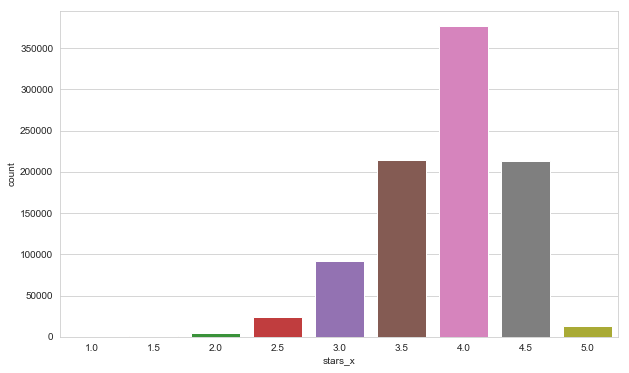

In [622]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(df_business_rest2['stars_x'])


# maximum number of people have given 4 stars.

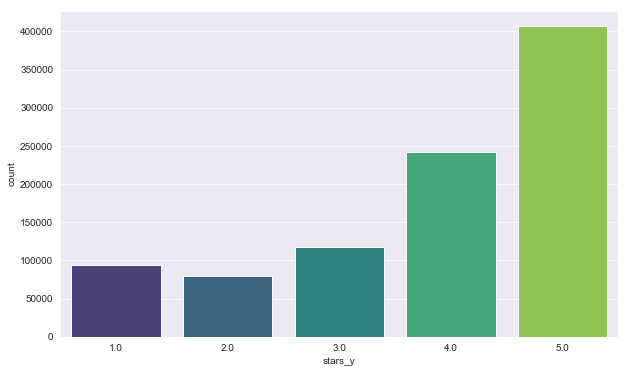

In [623]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(df_business_rest2['stars_y'],palette='viridis')


# maximum number of people have given 5 stars.

In [631]:
# Top 10 restaurants on the basis of number of Cool remarks count.


df_business_rest2.groupby('name')['cool'].count().sort_values(ascending=False)[:10].iplot(kind='bar',color='blue')

In [626]:
# Top 10 restaurants on the basis of number of funny remarks count.


df_business_rest2.groupby('name')['funny'].count().sort_values(ascending=False)[:10].iplot(kind='bar',color='red')

In [649]:
df_business_rest2.groupby('name')['review_count'].count().sort_values(ascending=False)[:10]

name
Yardbird Southern Table & Bar                  4979
Bouchon                                        4305
The Peppermill Restaurant & Fireside Lounge    3859
Mesa Grill                                     3614
Gangnam Asian BBQ Dining                       3611
Holsteins                                      3495
Pampas Las Vegas                               3098
Monta Japanese Noodle House                    2928
Paris Las Vegas                                2891
Sakana                                         2683
Name: review_count, dtype: int64

In [642]:
# now we do not require category2 column.

# del(df_business_rest2['categories2'])

In [643]:
df_business_rest2.head(1)

,name,business_id,categories,review_count,stars_x,text,stars_y,cool,funny,useful
0,China,AUwEs6MUl3-9AlCh-PEAZQ,"Restaurants, Chinese",10,3.0,"Been going here for years, it's my 'neighborho...",4.0,0,0,1


In [646]:
# Lets filter out more data.

In [651]:
df_business_rest2 = df_business_rest2[(df_business_rest2['stars_y'] >= 4) & (df_business_rest2['stars_y'] <= 5)] 

In [652]:
df_business_rest2.shape

(648869, 10)

In [ ]:
df_max_review_counts = pd.DataFrame(df_business_rest2.groupby('name')['review_count'].max().sort_values(ascending=False)[:10])

In [684]:
df_max_review_counts

,review_count
name,
Hash House A Go Go,6751
Yardbird Southern Table & Bar,4828
Bouchon,4138
Gordon Ramsay Pub & Grill,4019
The Peppermill Restaurant & Fireside Lounge,3771
Mesa Grill,3533
"Snooze, An A.M. Eatery",3515
Gangnam Asian BBQ Dining,3512
Holsteins,3414


In [691]:
df_business_rest2['text_len'] = df_business_rest2['text'].apply(lambda x : len(x))

In [705]:
df_business_rest2[(df_business_rest2['name']=='Hash House A Go Go') & (df_business_rest2['text_len'] >= 60) & 
                  (df_business_rest2['text_len'] < 100)]['text'].iloc[1]

'Large amount of food great tastes, plate size pancakes,great bloody Marys.\nYou can share plates!'

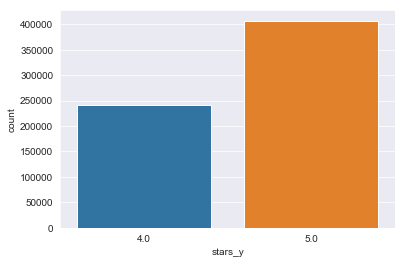

In [707]:
sns.countplot(df_business_rest2['stars_y'])

In [708]:
df_business_rest3 = df_business_rest2[df_business_rest2['stars_y']==5]

In [711]:
df_business_rest3.shape

(406898, 11)

In [744]:
df_business_rest3.groupby('name')['review_count'].max().sort_values(ascending=False)[:10]

name
Hash House A Go Go                             6751
Yardbird Southern Table & Bar                  4828
Bouchon                                        4138
Gordon Ramsay Pub & Grill                      4019
The Peppermill Restaurant & Fireside Lounge    3771
Mesa Grill                                     3533
Snooze, An A.M. Eatery                         3515
Gangnam Asian BBQ Dining                       3512
Holsteins                                      3414
HEXX kitchen + bar                             3305
Name: review_count, dtype: int64

In [773]:
df_business_rest3[(df_business_rest3['name']=='Hash House A Go Go') &
                  (df_business_rest3['review_count'].max())][:1][['text','categories']].iloc[0][0]

"I highly recommend this restaurant if you're in Vegas for breakfast. The portions are huge and the service was promp! The hostess Becky seated me with a smile and was so welcoming. My server Liz is really a gem. She even brought me a hot towel when I got some syrup  on  my sweater. Super Service!\n\nThe hotel operator recommended I order the chicken and bacon waffles partially because the food is enough to last me all the way on my drive home. I will come back again!"

In [774]:
df_business_rest3[(df_business_rest3['name']=='Yardbird Southern Table & Bar') &
                  (df_business_rest3['review_count'].max())][:1][['text','categories']].iloc[0][0]

"I don't really like fried chicken but Yardbird fried chicken is really good. It's really the best fried chicken I've ever had."

In [775]:
df_business_rest3[(df_business_rest3['name']=='Bouchon') &
                  (df_business_rest3['review_count'].max())][:1][['text','categories']].iloc[0][0]

"I love Bouchon. It's still my favorite place to go hands down. They are extremly fresh and have excellent service. I ate at the bouchon in Beverly hills and didn't encounter a single difference in food quality in Vegas. The food has always been delicious and this one time I went we ordered practically everytihng. From the bakery basket in which the waiter chooses for us a selection of baked goods to the mussels to the hash. \n\nEverything was delicious. And you can't beat the price around 20-30 a person with small apps. Or aroudn 40-50 if your drinkin a little. Very reasonable for what your getting.\n\nTake a peek at my photos.\n\nThanks Thomas Keller for a great meal again!"

In [777]:
df_business_rest3[(df_business_rest3['name']=='Gordon Ramsay Pub & Grill') & 
                  (df_business_rest3['review_count'].max())][:1][['categories','text']].iloc[0][1]

'Had an awesome time here. Food was awesome and service was quick. Our server Rodney was the best, he was very knowledgable with the items in the menu.'

In [778]:
df_business_rest3[(df_business_rest3['name']=='The Peppermill Restaurant & Fireside Lounge') & 
                  (df_business_rest3['review_count'].max())][:1][['categories','text']].iloc[0][1]

"OMG FANTASTIC!! The French toast was soooooo gooood...I special ordered it with just bananas and strawberries, the idea of grapes and melon on French Toast didn't sit right with me. We ate there two days in a row. Both days we sat at the counter because the wait was 20-30+ minutes. They have giant coffee cups which was great - no waiting for refills. Atmosphere is great - old school neon and such. You can even have a cocktail with breakfast. Go it is work the wait."

In [768]:
df_business_rest3[(df_business_rest3['name']=='Mesa Grill') & 
                  (df_business_rest3['review_count'].max())][:1][['categories','text']].iloc[0]

categories    Southern, Mexican, New Mexican Cuisine, Spanis...
text          Bobby Flay makes delicious food. \n\nI have be...
Name: 497848, dtype: object

In [770]:
df_business_rest3[(df_business_rest3['name']=='Gangnam Asian BBQ Dining') & 
                  (df_business_rest3['review_count'].max())][:1][['categories','text']].iloc[0]

categories    Asian Fusion, Barbeque, Tapas/Small Plates, Ko...
text          Food is FRESH, great service and the cost is v...
Name: 266841, dtype: object

# Analysis of best restaurants:

## Here the top 10 restaurants include dinner restaurants, nightclubs, breakfast restaurants, mexican cusine restaurants, etc

## most reviews are of breakfast restaurants.

### If a person wants to open a new restaurant on the basis of yelp dataset analysis, 
### I would recommend to open a breakfast ( morning ) restaurant having items dishes of several countries because at every corner of this world we will get people belonging to numerous number of regions.

### And don't forget to add Traditional Dishes ( as per the location of the restaurannt ) to your Amazing Restaurant Menu.


